<a href="https://colab.research.google.com/github/carloslizarragac/FisicaComputacional1/blob/master/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Marzo 9, 2021
import numpy as np
import matplotlib.pyplot as plt


### Solución Numérica de Ecuaciones Diferenciales con Python.

Iniciamos el tema definiendo la forma general de una [ecuación difererencial ordinaria](https://en.wikipedia.org/wiki/Ordinary_differential_equation), definida por un polinomio de una combinación de derivadas de distinto orden de una función $y(t)$

\begin{equation*} 
a_0(t) y + a_1(t) y^{\prime} + 
a_2(t) y^{\prime\prime} + \cdots + 
a_n(t) y^{(n)} + b(t) = 0
\end{equation*}

donde $a_0(t), a_1(t), a_2 (t), \ldots , a_n(t)$ y $b(t)$ son funciones diferenciables arbitrarias no necesariamente lineales y 
$y^{\prime}, y^{\prime\prime}, \ldots, y^{n}$ son las derivadas consecutivas de la función desconocida $y(t)$.

No todas las ecuaciones diferenciales pueden ser resueltas de forma analítica, por lo que se recurre a buscar las soluciones de forma numérica. 

  


### Sistema de Ecuaciones diferenciales ordinarias.

Una ecuación diferencial de orden $k$, puede ser resuelta de forma más fácil si podemos reducirla a un sistema de $k$ ecuaciones de primero orden.
La ecuación diferencial

\begin{eqnarray*}
a_0 y(t) + a_1(t) y^{\prime} + 
a_2(t) y^{\prime\prime} + \cdots + 
a_{k-1}(t) y^{k-1} & = & y^{k} \\
F(t, y, y^{\prime}, y^{\prime\prime}, 
\ldots , y^{k-1}) & = & y^{k}
\end{eqnarray*}

se puede reescribir, definiendo $y_1, y_2, \ldots, y_{k-1}$ funciones dependientes de $t$

\begin{eqnarray*}
y_1^{\prime} & = & y_2 \\
y_2^{\prime} & = & y_3 \\
y_3^{\prime} & = & y_4 \\
\vdots &  & \vdots \\
y_{k-1}^{\prime} & = & y_k \\
y_k^{\prime} & = & F(t, y_1, y_2, \ldots , y_k)
\end{eqnarray*}

o escrita vectorialmente como

\begin{equation*}
\vec{y}_k^{\prime} = \vec{F}(t, \vec{y})
\end{equation*}



Método de Euler.

El [método de Euler](https://en.wikipedia.org/wiki/Euler_method) es un método de primer orden de integración de una ecuación diferencial.

\begin{equation*}
y^{\prime} = f(t, y(t)), \ \ \mathrm{para} \ \ y(t_0) = y_0  
\end{equation*}

De existir la solución de ésta ecuación diferencial, hay una familia de soluciones $y(t) + c$, y la condición inicial $y(t_0)=y_0$ selecciona la única solución que la satisface. 

Para un incremento temporal discreto $h$, la solución la la ecuación diferencial se puede aproximar a primer orden (Serie de Taylor de orden 1)

\begin{equation*}
y_{n+1} = y_n + h f(t_n, y_n)
\end{equation*}

Se dice que éste método es explícito, dado que se requiere conocer la información de la función $y_n=y(t_n)$ al tiempo $t_n=t_0+n h$ para predecir la solución $y_{n+1}$. 

El error depende del tamaño del paso $h$, pero también al reducir el tamañp $h$ requiere realizar computacionalmente más pasos.  


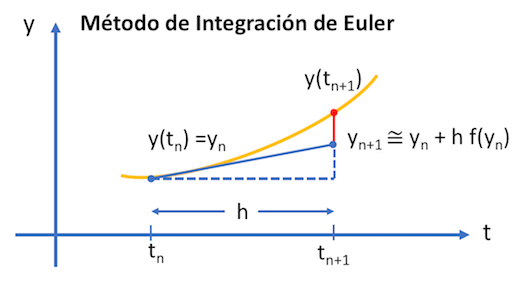

In [30]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y


### Ejemplos

**Función exponencial**

Nos interesa resover la ecuación diferencial

\begin{equation*}
y^{\prime} = y, \ \ \mathrm{para} \ y_0=1
\end{equation*}

en el dominio $t \in [0,2]$. 

Conocemos que la solución analítica de la ecuación diferencial anterior es $y(t) = \exp (t)$. Podremos constrastar la solución numérica del método de Euler con la solución analítica.


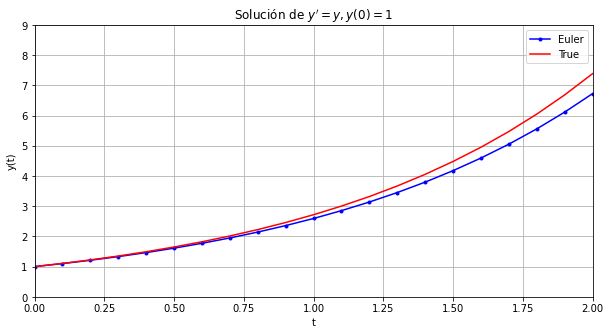

In [31]:
# Solución numérica
# Tomamos un h=0.1
t = np.linspace(0,2,21)
y0 = 1
# Definimos la función f(t,y) = y
f = lambda y,t: y
# La solución de la ecuación diferencial usando el método de Euler
y = odeEuler(f,y0,t)
# La solución analítica conocida
y_true = np.exp(t)

plt.figure(figsize=(10,5))
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid()
plt.title("Solución de $y'=y , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


**Ecuación diferencial no  lineal**

Buscamos la solución de la ecuación diferencial 

\begin{equation*}
y^{\prime} = y^2 \ \mathrm{para} \ y(0) = -1
\end{equation*}

en el dominio $t \in [0,5]$. Se conoce la solución analítica de la ecuación anterior. 

\begin{equation*}
y(t) = \frac{-1}{t+1}
\end{equation*}

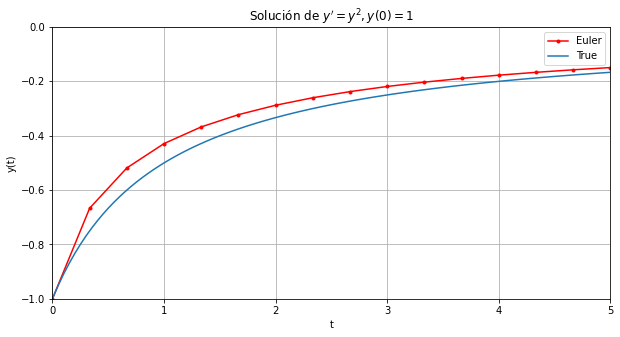

In [32]:
t = np.linspace(0,5,16)
y0 = -1
# Definimos la función f(t,y) = y**2
f = lambda y,t: y**2
# Usamos el método de Euler
y = odeEuler(f,y0,t)
t_true = np.linspace(0,5,100)
y_true = -1/(t_true + 1)

plt.figure(figsize=(10,5))
plt.plot(t,y,'r.-',t_true,y_true)
plt.legend(['Euler','True'])
plt.grid()
plt.axis([0,5,-1,0])
plt.title("Solución de $y'=y^2 , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


**Ecuación diferencial de Segundo Orden.** 

La ecuación de movimiento de un péndulo de masa $m$, longitud $l$ está dada por 

\begin{equation*}
\frac{d^2 \theta}{d t^2} + b \frac{d \theta}{dt} +  \frac{g}{l} \sin \theta = 0
\end{equation*}

donde $b$ es un coeficiente de amortiguamiento (fricción),  $g$ es la aceleración debida a la fuerza de gravedad y $\theta$ es el ángulo de desplazamiento respecto a la vertical.

Para ángulos pequeños $\theta << 1$, la función $\sin (\theta) \approx \theta$, tendremos la ecuación


\begin{equation*}
\frac{d^2 \theta}{d t^2} + b \frac{d \theta}{dt}+ \frac{g}{l} \theta = 0
\end{equation*}

Definiendo $d\theta / dt = \omega$, podemos reescribir la ecuación diferencial de segundo grado como un sistema de 2 ecuaciones de primer orden

\begin{eqnarray*}
\frac{d \theta}{dt} & = & \omega = f_1(t)\\
\frac{d \omega}{dt} & = & -b \omega - k \theta = f_2(t)\\ 
\end{eqnarray*}

donde $k = g/l$. 

La ecuación anterior se puede escribir vectorialmente como

\begin{equation*}
\frac{d}{dt} \vec{y} = \begin{bmatrix}
0 & 1 \\
-k & -b \\
\end{bmatrix} \vec{y} = A \vec{y} = \vec{F}(t, \vec{y}) = (f_1(t), f_2(t))
\end{equation*}

donde 
\begin{equation*}
\vec{y} = \begin{bmatrix}
\theta \\
\omega \\
\end{bmatrix}
\end{equation*}

La biblioteca SciPy tiene una función para integrar sistemas de ecuaciones diferenciales [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint). Haremos uso de ella. 



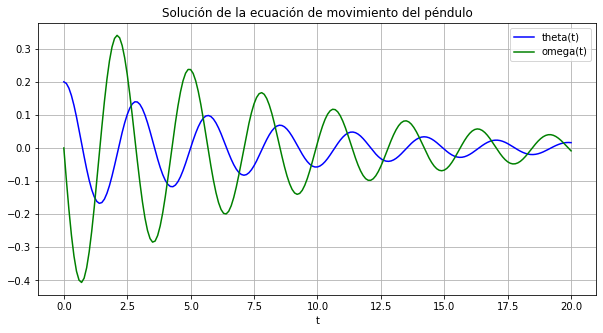

In [33]:
from scipy.integrate import odeint

# Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
# La solución y es un arreglo 1-D, y=(theta, omega), dy/dt es un arreglo

def pendulo(y, t, b, k):
        theta, omega = y
        dydt = [omega, -b*omega - k*theta]
        return dydt

# Definimos las constantes g, la longitud l del péndulo y el coeficiente de fricción b.
g = 9.81
l = 2.0

k = g/l
b = 0.25

# Definimos las condiciones iniciales theta=0.2, y omega = 0 (el péndulo de "suelta")
y0 = [0.2, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 20, 201)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(pendulo, y0, t, args=(b, k))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='theta(t)')
plt.plot(t, y[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del péndulo')
plt.xlabel('t')
plt.grid()
plt.show()



**Ejercicio 1:**

Resuelva la ecuación diferencial del [oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal. 

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

